<a href="https://colab.research.google.com/github/vsemwal/Deep_Learning_MANIT/blob/master/iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: /root/.keras/datasets/iris_training.csv
Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species
OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([7.4, 6.7, 7.7, 6.3, 4.4, 5. , 6.8, 6.5, 6.8, 4.8, 4.8, 7.2, 5.8,
       4.7, 4.6, 6.3, 6.6, 7.2, 4.7, 6.2, 5.7, 5. , 6.9, 4.4, 5.5, 6.5,
       4.6, 7.9, 6.3, 6.3, 5.1, 5.6], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.8, 3. , 2.6, 2.7, 3.2, 3. , 2.8, 3. , 3.2, 3. , 3. , 3.2, 2.6,
       3.2, 3.1, 3.3, 3. , 3. , 3.2, 3.4, 2.8, 3.4, 3.1, 2.9, 2.6, 3. ,
       3.2, 3.8, 2.3, 3.4, 3.8, 2.7], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([6.1, 5.2, 6.9, 4.9, 1.3, 1.6, 4.8, 5.5, 5.9, 1.4, 1.4, 6. , 4. ,
       1.3, 1.5, 4.7, 4.4

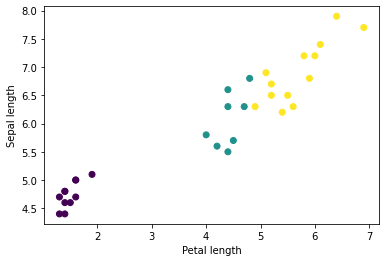

tf.Tensor(
[[5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [6.8 2.8 4.8 1.4]
 [5.1 2.5 3.  1.1]
 [7.7 2.8 6.7 2. ]], shape=(5, 4), dtype=float32)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Prediction: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1]
    Labels: [0 1 1 1 2 1 0 0 2 1 2 2 1 2 2 0 1 0 1 1 0 0 1 1 2 2 2 1 0 0 1 0]


In [0]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)
features, labels = next(iter(train_dataset))
print(features)
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels
train_dataset = train_dataset.map(pack_features_vector)
features, labels = next(iter(train_dataset))

print(features[:5])
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])
model.summary();
predictions = model(features)
predictions[:5]
tf.nn.softmax(predictions[:5])
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

In [0]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris versicolor (41.5%)
Example 1 prediction: Iris versicolor (52.8%)
Example 2 prediction: Iris versicolor (58.9%)
